<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-10-30 07:35:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  46.5MB/s    in 0.8s    

2024-10-30 07:35:27 (46.5 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [3]:
pip install --upgrade seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 24.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0
Note: you may need to restart the kernel to use updated packages.


Import pandas module.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


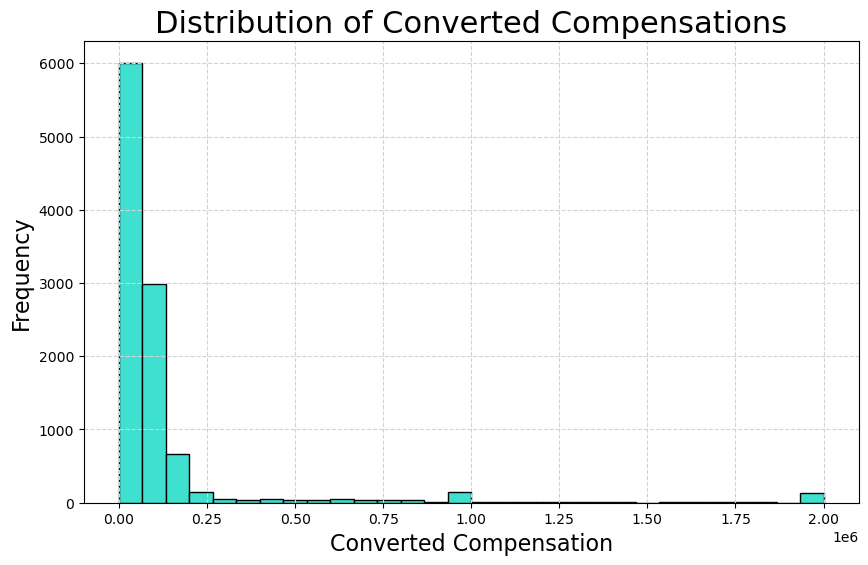

In [9]:
QUERY = """
SELECT ConvertedComp FROM master
"""
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.hist(df["ConvertedComp"].dropna(), bins=30, color="turquoise", edgecolor="black")

plt.title("Distribution of Converted Compensations", fontsize = 22)
plt.xlabel("Converted Compensation", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.grid(color="lightgray", linestyle='--')
plt.show()

### Box Plots


Plot a box plot of `Age.`


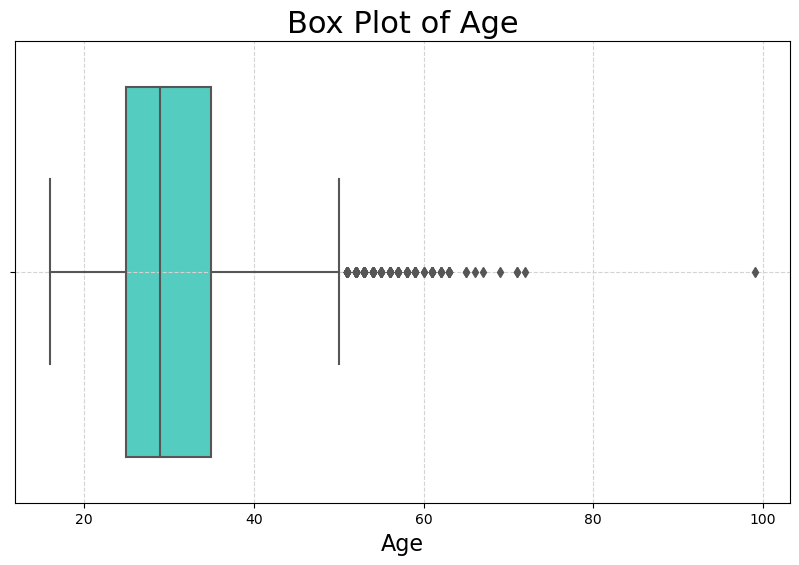

In [10]:
# your code goes here
QUERY = """
SELECT Age FROM master
"""
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Age"], color="turquoise")

plt.title("Box Plot of Age", fontsize=22)
plt.xlabel("Age", fontsize=16)
plt.grid(color="lightgray", linestyle="--")
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


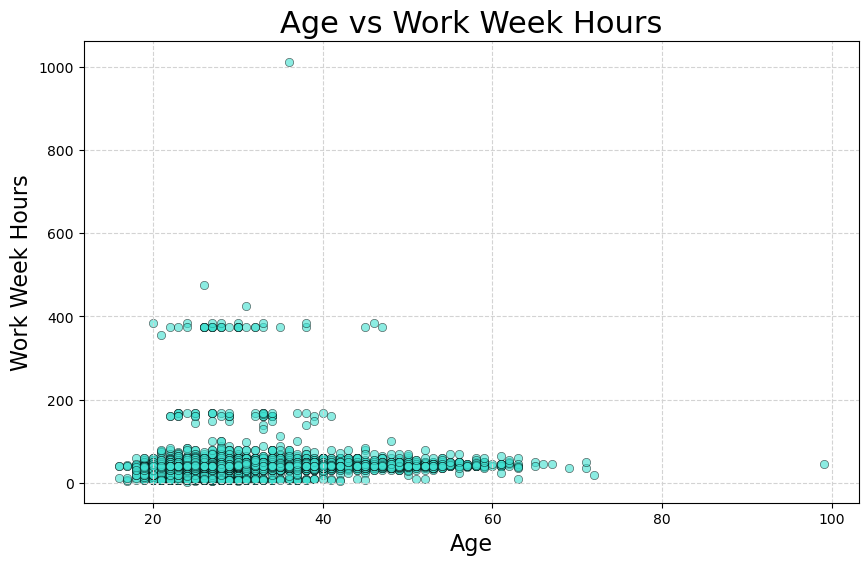

In [11]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs FROM master
"""
df = pd.read_sql_query(QUERY, conn)
df_clean = df.dropna(subset=["Age", "WorkWeekHrs"])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x="Age", y="WorkWeekHrs", alpha=0.6, color="turquoise", edgecolor="black")

plt.title("Age vs Work Week Hours", fontsize = 22)
plt.xlabel("Age", fontsize = 16)
plt.ylabel("Work Week Hours", fontsize = 16)
plt.grid(color="lightgray", linestyle="--")
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


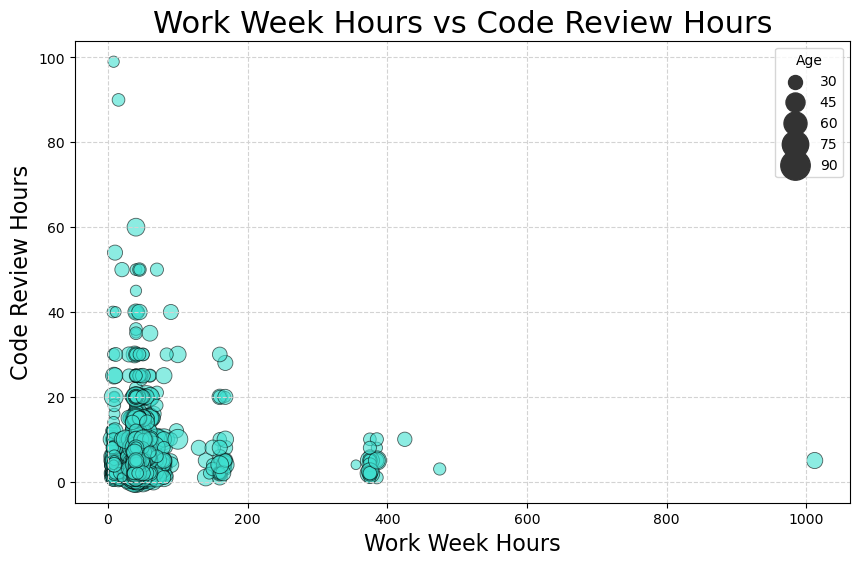

In [12]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
"""
df = pd.read_sql_query(QUERY, conn)
df_clean = df.dropna(subset=["WorkWeekHrs", "CodeRevHrs", "Age"])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x="WorkWeekHrs", y="CodeRevHrs", 
                size="Age", sizes=(20, 500),
                alpha=0.6, color="turquoise", edgecolor="black")

plt.title("Work Week Hours vs Code Review Hours", fontsize = 22)
plt.xlabel("Work Week Hours", fontsize = 16)
plt.ylabel("Code Review Hours", fontsize = 16)
plt.grid(color="lightgray", linestyle="--")
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


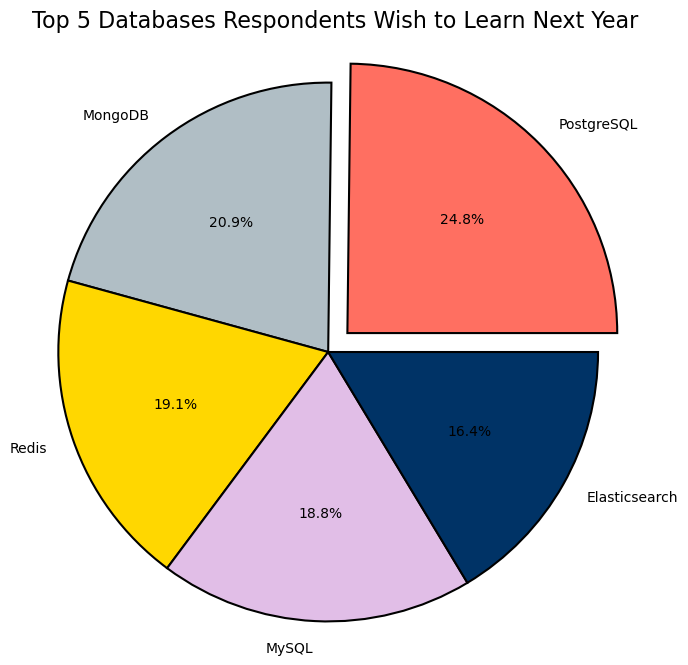

In [13]:
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as count 
FROM DatabaseDesireNextYear 
GROUP BY DatabaseDesireNextYear 
ORDER BY count DESC 
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)

labels = df["DatabaseDesireNextYear"]
sizes = df["count"]
colors = ["#FF6F61", "#B0BEC5", "#FFD700", "#E1BEE7", "#003366"]

explode = [0.1 if size == max(sizes) else 0 for size in sizes]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors,
                wedgeprops=dict(edgecolor='black', linewidth=1.5))
plt.title("Top 5 Databases Respondents Wish to Learn Next Year", fontsize=16)
plt.axis("equal")
plt.show()

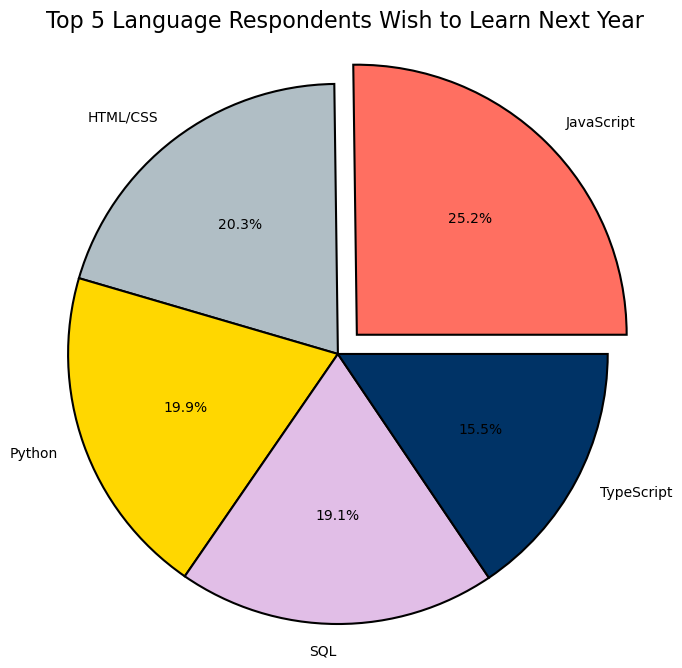

In [14]:
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*) as count 
FROM LanguageDesireNextYear 
GROUP BY LanguageDesireNextYear 
ORDER BY count DESC 
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)

labels = df["LanguageDesireNextYear"]
sizes = df["count"]
colors = ["#FF6F61", "#B0BEC5", "#FFD700", "#E1BEE7", "#003366"]

explode = [0.1 if size == max(sizes) else 0 for size in sizes]

# Set up the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors, 
        wedgeprops=dict(edgecolor='black', linewidth=1.5))

plt.title("Top 5 Language Respondents Wish to Learn Next Year", fontsize=16)
plt.axis("equal")
plt.show()

In [15]:
QUERY = """
SELECT COUNT(*) AS count_sql 
FROM LanguageWorkedWith 
WHERE LanguageWorkedWith LIKE "%SQL%"
"""
df = pd.read_sql_query(QUERY, conn)
counts = df["count_sql"].iloc[0]

print(f"Number of respondents who work with SQL: {counts}")

Number of respondents who work with SQL: 7106


In [16]:
QUERY = """
SELECT * FROM DatabaseWorkedWith
"""
df = pd.read_sql_query(QUERY, conn)

counts = df.groupby("Respondent").size().reset_index(name="count")
uniques = counts[counts["count"] == 1]["Respondent"]
uniq_mysql = df[(df["Respondent"].isin(uniques)) & (df["DatabaseWorkedWith"] == "MySQL")].shape[0]

print(f"Number of respondents who work with MySQL only: {uniq_mysql}")

Number of respondents who work with MySQL only: 474


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


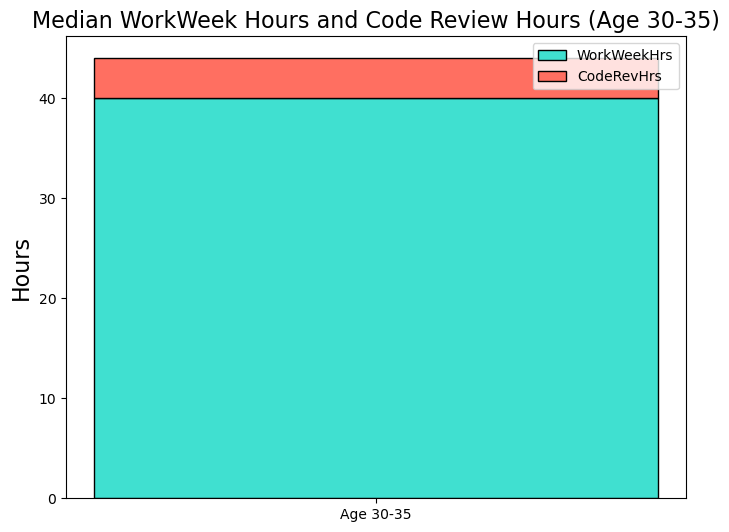

In [17]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master 
WHERE Age BETWEEN 30 AND 35
"""
df = pd.read_sql_query(QUERY, conn)

median_work_week_hrs = df["WorkWeekHrs"].median()
median_code_rev_hrs = df["CodeRevHrs"].median()

plt.figure(figsize=(8, 6))

plt.bar("Age 30-35", median_work_week_hrs, color="#40E0D0", label="WorkWeekHrs", edgecolor="black")
plt.bar("Age 30-35", median_code_rev_hrs, bottom=median_work_week_hrs, color="#FF6F61", label="CodeRevHrs", edgecolor="black")

plt.title("Median WorkWeek Hours and Code Review Hours (Age 30-35)", fontsize=16)
plt.ylabel("Hours", fontsize=16)
plt.legend()
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


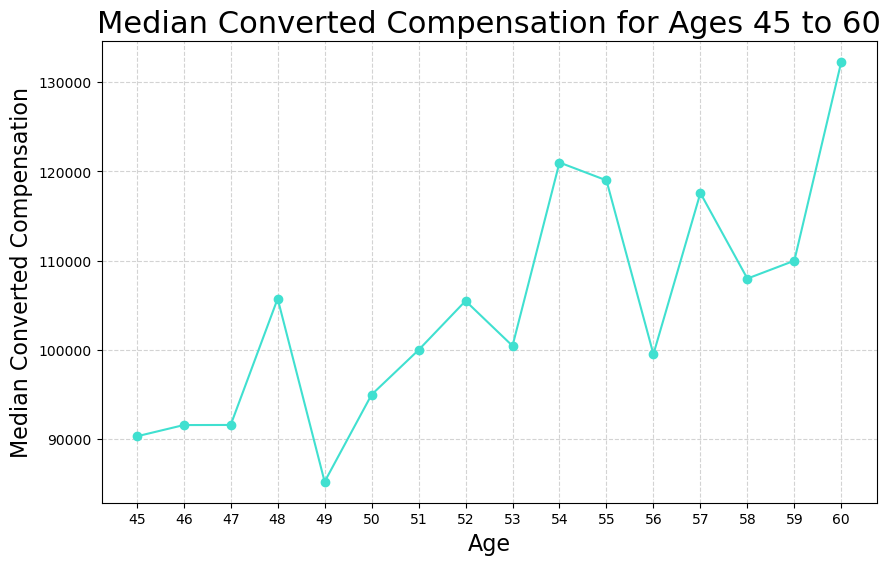

In [18]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp FROM master 
WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY, conn)
median_comp_by_age = df.groupby("Age")["ConvertedComp"].median().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age["Age"], median_comp_by_age["ConvertedComp"], marker="o", color="turquoise")

plt.title("Median Converted Compensation for Ages 45 to 60", fontsize=22)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Median Converted Compensation", fontsize=16)
plt.xticks(median_comp_by_age["Age"])
plt.grid(color="lightgray", linestyle="--")
plt.show()

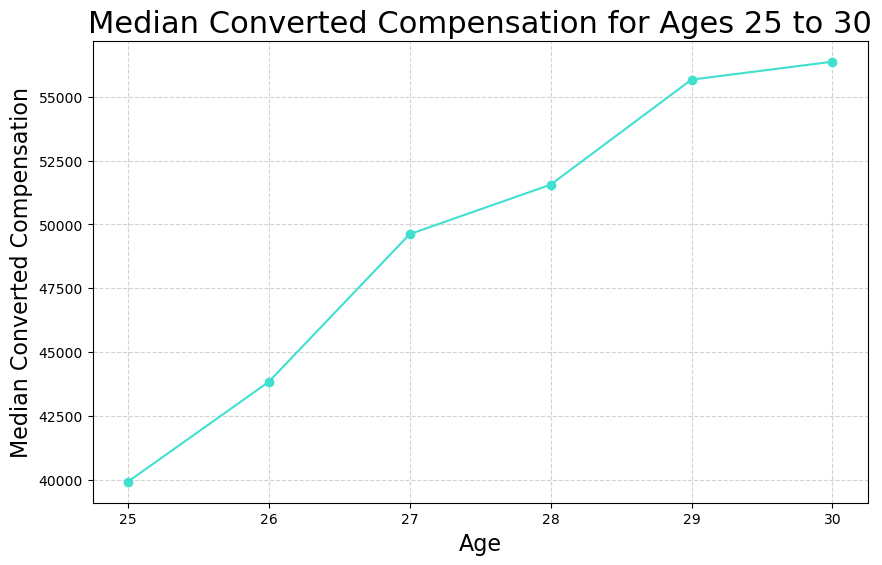

In [19]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp FROM master 
WHERE Age BETWEEN 25 AND 30
"""
df = pd.read_sql_query(QUERY, conn)
median_comp_by_age = df.groupby("Age")["ConvertedComp"].median().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age["Age"], median_comp_by_age["ConvertedComp"], marker="o", color="turquoise")

plt.title("Median Converted Compensation for Ages 25 to 30", fontsize=22)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Median Converted Compensation", fontsize=16)
plt.xticks(median_comp_by_age["Age"])
plt.grid(color="lightgray", linestyle="--")
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


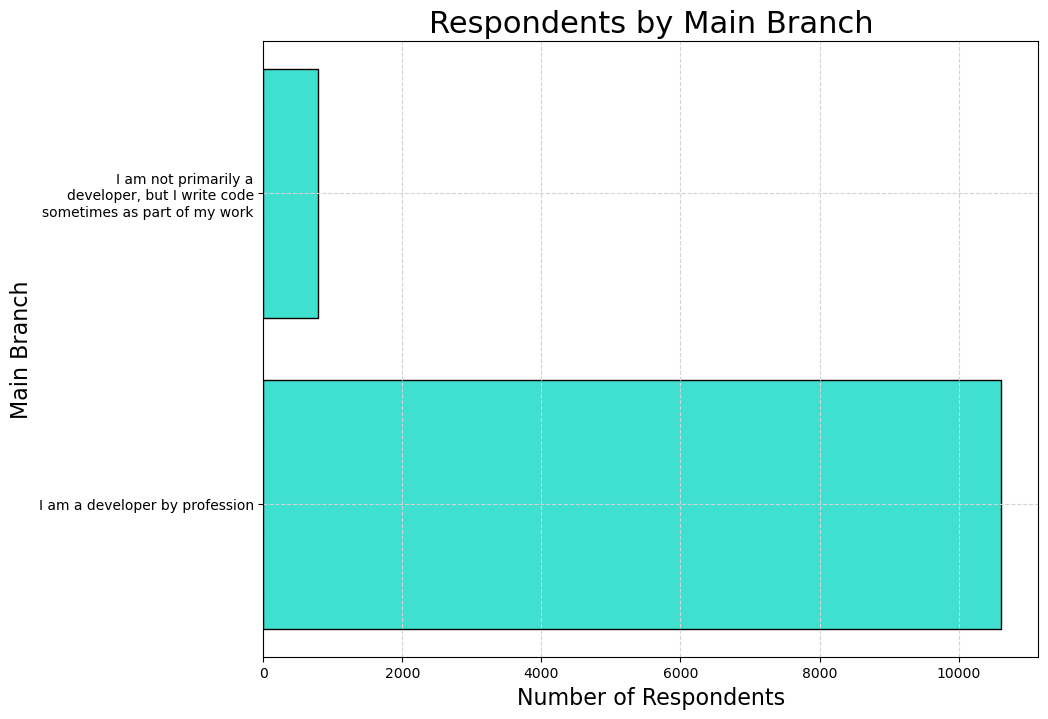

In [20]:
# your code goes here
import textwrap
QUERY = """
SELECT MainBranch, COUNT(*) as count FROM master
GROUP BY MainBranch
"""
df = pd.read_sql_query(QUERY, conn)
df["MainBranch"] = df["MainBranch"].apply(lambda x: "\n".join(textwrap.wrap(x, width=30)))

plt.figure(figsize=(10, 8))
plt.barh(df["MainBranch"], df["count"], color="turquoise", edgecolor="black")

plt.title("Respondents by Main Branch", fontsize=22)
plt.xlabel("Number of Respondents", fontsize=16)
plt.ylabel("Main Branch", fontsize=16)
plt.grid(color="lightgray", linestyle='--')
plt.show()

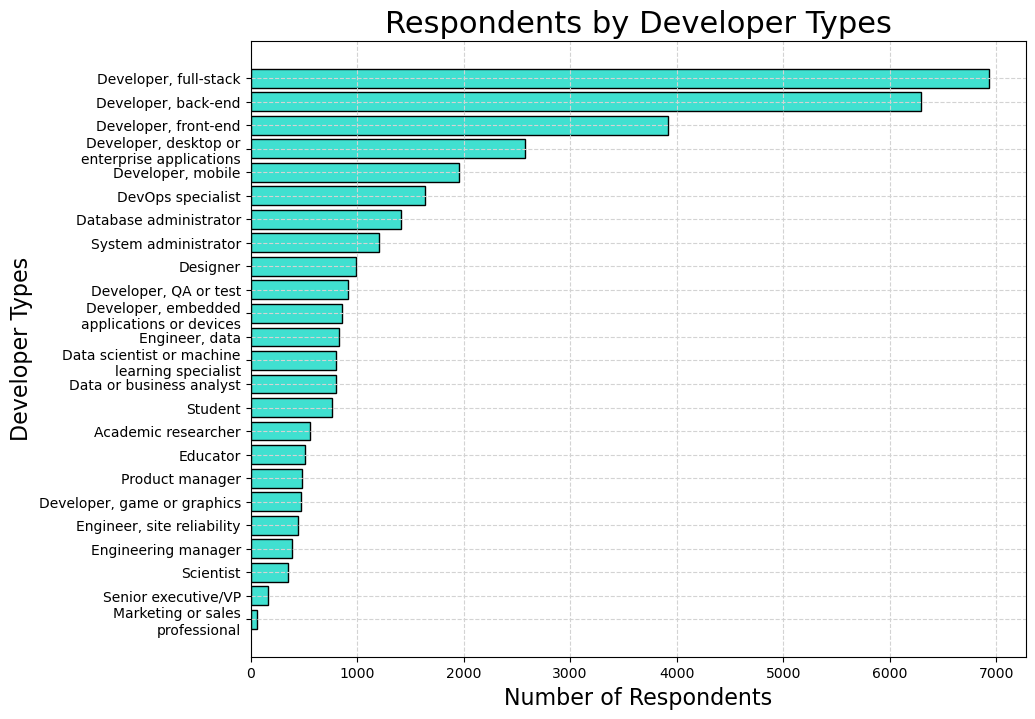

In [21]:
QUERY = """
SELECT DevType, COUNT(*) as count 
FROM DevType 
GROUP BY DevType 
ORDER BY count 
"""
df = pd.read_sql_query(QUERY, conn)
df["DevType"] = df["DevType"].apply(lambda x: "\n".join(textwrap.wrap(x, width=30)))

plt.figure(figsize=(10, 8))
plt.barh(df["DevType"], df["count"], color="turquoise", edgecolor="black")

plt.title("Respondents by Developer Types", fontsize=22)
plt.xlabel("Number of Respondents", fontsize=16)
plt.ylabel("Developer Types", fontsize=16)
plt.grid(color="lightgray", linestyle='--')
plt.show()

Close the database connection.


In [22]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
